<a href="https://colab.research.google.com/github/Aloxxa/r_public/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_AiGrind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 1AtnGvtLZVabiTLFFoDMgKqgbvWm3JLN6
!gdown --id 136kWK_Wvlnr1TBMjEVCzLBZq0aumLIkq
!gdown --id 1My1SOnivc9tpQk2l6fvPtAINAAwRB1Pr

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1AtnGvtLZVabiTLFFoDMgKqgbvWm3JLN6
To: /content/energy.csv
100% 38.7k/38.7k [00:00<00:00, 53.6MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=136kWK_Wvlnr1TBMjEVCzLBZq0aumLIkq
To: /content/guild_data.csv
100% 57.7k/57.7k [00:00<00:00, 36.0MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://dr

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [ ]:
datae = pd.read_csv('/content/energy.csv')
datag = pd.read_csv('/content/guild_data.csv')
datap = pd.read_csv('/content/payers.csv')

In [ ]:
dfe = datae.copy()
dfg = datag.copy()
dfp = datap.copy()

# Шаг 1

Определить критерии активности гильдий на основании файлов guild_data.csv, energy.csv.

Самостоятельно выбрать метод:

Экспертно, на основании средних значений признаков

Экспертно, на основании квартилей распределения признаков

Кластеризация методом ближайших соседей

Можете предложить свой метод

Обосновать выбранный метод. Определить оптимальное количество групп, по которым будут распределяться гильдии.

После определения критериев:

 распределить гильдии по классам или кластерам (в зависимости от выбранного метода), описать пороговые значения значимых признаков для попадания в тот или иной класс/кластер, перечислить признаки, которые оказались бесполезными (не влияющими на распределение по классам/кластерам).

В результате выполнения этого шага нужно предоставить статистику с распределением гильдий по выявленным классам или кластерам. Можно визуализировать распределение признаков для каждой группы гильдий. Дать ответ относительно первой гипотезы.


In [ ]:
import missingno as msno

In [ ]:
df1 = pd.merge(dfg, dfe, how='left', on='guild_id')
df1.shape[0]

1095

In [ ]:
df1.head()

,datetime,creator_character_id,guild_id,n_added_characters,n_removed_characters,n_talents,level,n_missions_completed,n_times_flag_turned_on,mean_place,mean_rating,n_seasons,energy_delta,context_type
0,2022-12-12 23:13:42,15092203,78698,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-12 22:29:09,15961764,78604,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-12-12 21:01:53,16187808,78510,27,19.0,9.0,2.0,171.0,NaN,NaN,NaN,NaN,24680.0,GuildMissionRewardContext
3,2022-12-12 00:16:52,21618959,77899,42,35.0,12.0,3.0,171.0,NaN,NaN,NaN,NaN,37480.0,GuildMissionRewardContext
4,2022-12-12 22:13:50,23341705,78557,6,6.0,4.0,2.0,156.0,NaN,NaN,NaN,NaN,11140.0,GuildMissionRewardContext


In [ ]:
df1['context_type'].value_counts(normalize=True)

,proportion
context_type,
GuildMissionRewardContext,0.866117
ConvertKnowledgeToGuildEnergyContext,0.079300
CompleteGuildRaidMatchContext,0.054583


In [ ]:
df1 = df1.drop(columns=['datetime', 'creator_character_id', 'guild_id'])

<Axes: >

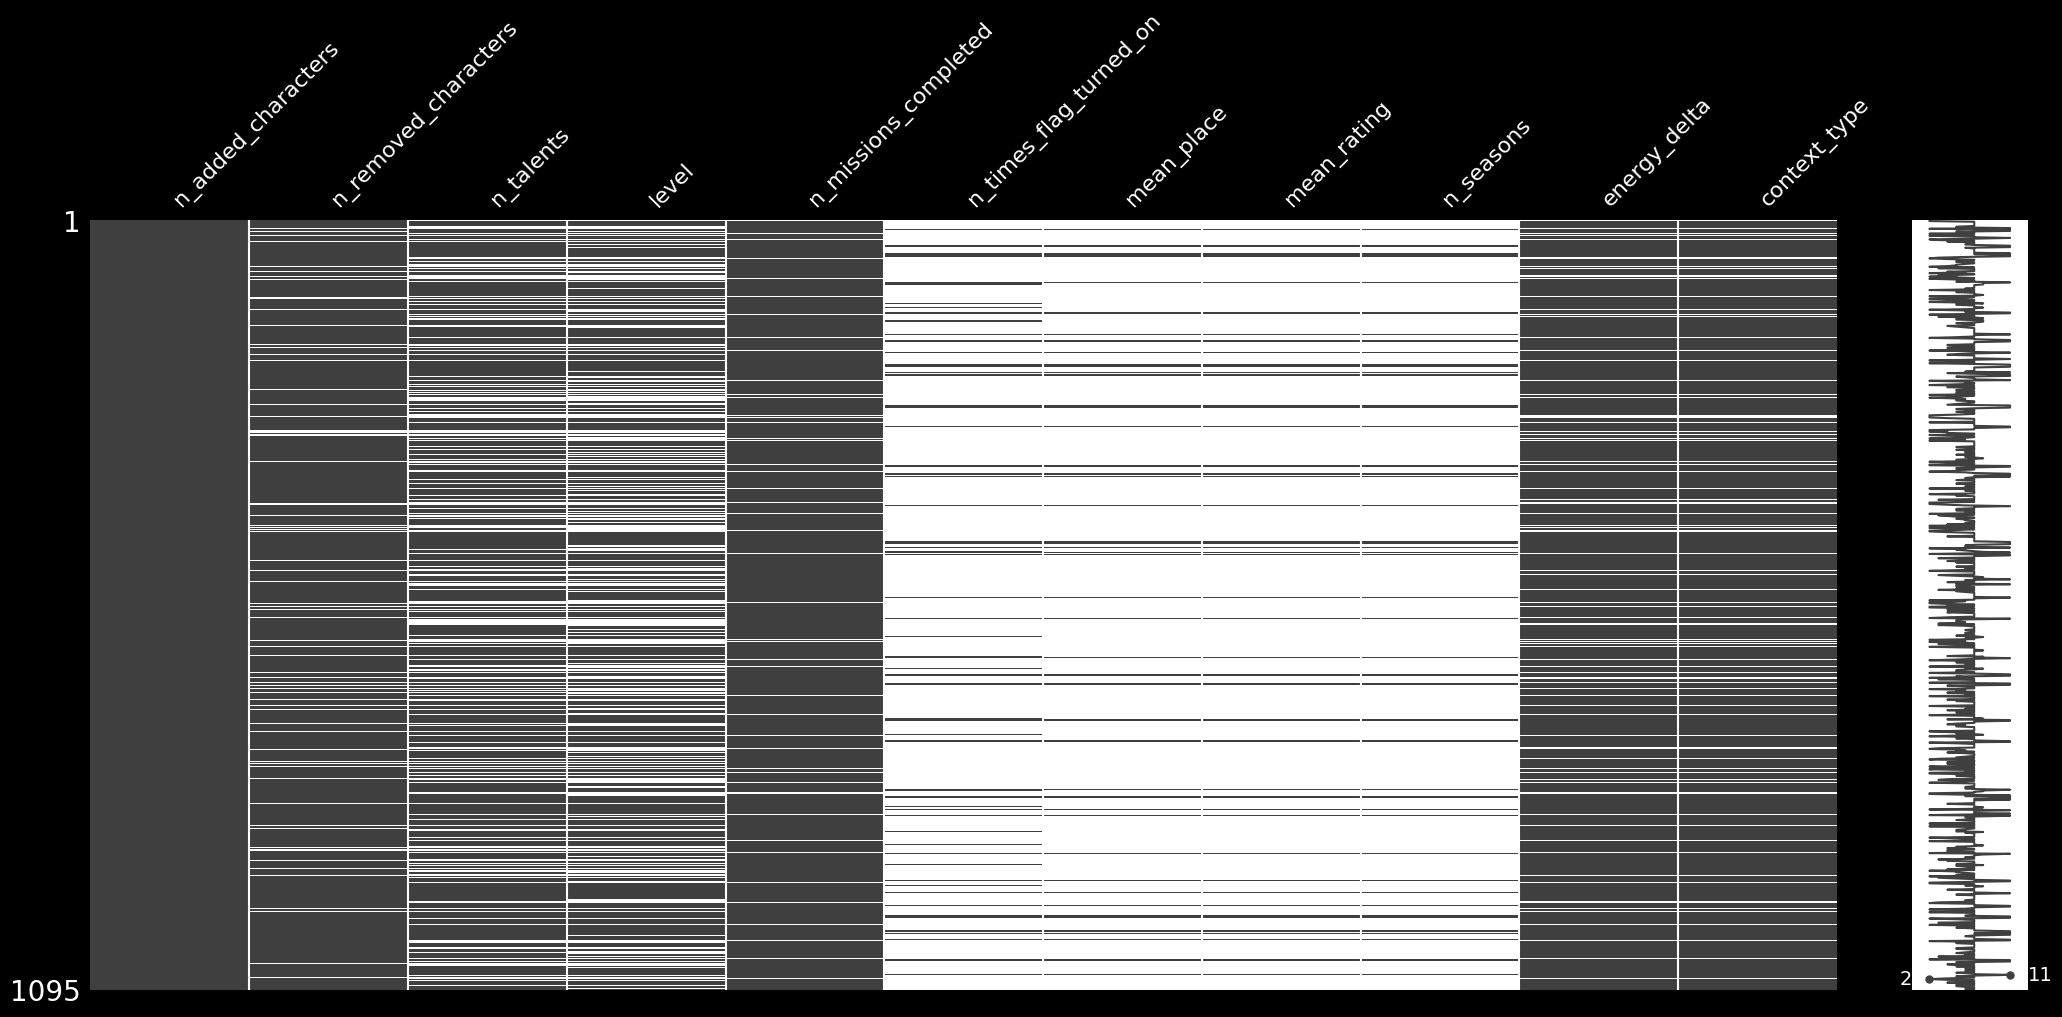

In [ ]:
msno.matrix(df1)

In [ ]:
df1 = df1.drop(columns=['mean_place','mean_rating', 'n_seasons', 'n_times_flag_turned_on'])

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
def fill_missing_values(df):
    df_num = df.select_dtypes(include=['int', 'float'])
    df_obj = df.select_dtypes(exclude=['int', 'float'])
    imputer = KNNImputer()
    df_num_filled = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)
    df_obj_filled = df_obj.fillna(df_obj.mode().iloc[0])
    df_filled = pd.concat([df_obj_filled, df_num_filled], axis=1)
    return df_filled

In [ ]:
df1 = fill_missing_values(df1)

In [ ]:
df1.isnull().sum()

,0
context_type,0
n_added_characters,0
n_removed_characters,0
n_talents,0
level,0
n_missions_completed,0
energy_delta,0


In [ ]:
numeric_cols = df1.select_dtypes(include='number').columns
df1_num = df1[numeric_cols]

Text(0.5, 1.0, 'Correlation Heatmap')

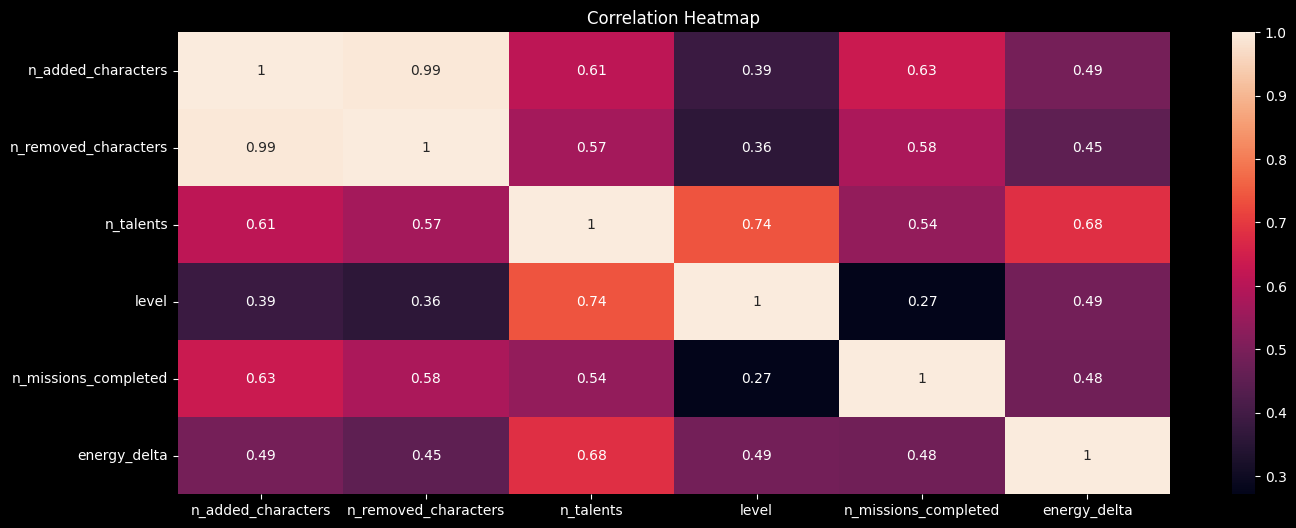

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(df1_num.corr(), annot=True)
plt.title('Correlation Heatmap')

In [ ]:
df1_num = df1_num.drop(columns=['n_added_characters', 'n_talents'])

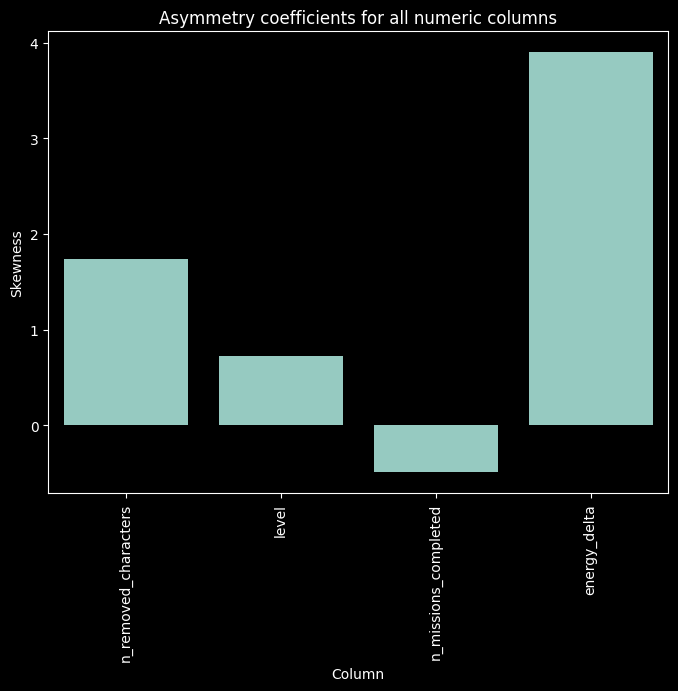

In [ ]:
skewness = df1_num.skew()
sns.barplot(x=skewness.index, y=skewness.values)
plt.title('Asymmetry coefficients for all numeric columns')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.xticks(rotation=90)
plt.show()

In [ ]:
skewness_features = ['energy_delta', 'level', 'n_removed_characters']
df1[skewness_features] = np.log(df1[skewness_features] + 0.1)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
lof = LocalOutlierFactor()
outliers = lof.fit_predict(df1[numeric_cols])
df1 = df1[outliers == 1]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
df1_num = df1[numeric_cols]

In [ ]:
df1_num_scaled = scaler.fit_transform(df1_num)

In [ ]:
from matplotlib import rcParams
from sklearn.manifold import TSNE

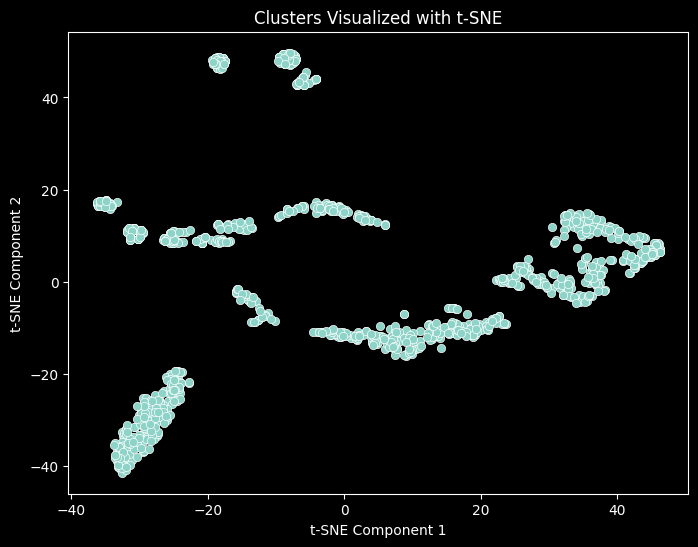

In [ ]:
rcParams['figure.figsize'] = (8, 6)
tsne = TSNE(n_components=2,  perplexity=40, learning_rate=3500, n_iter=2000)
X_tsne = tsne.fit_transform(df1_num_scaled)

df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

In [ ]:
!pip install hdbscan

In [ ]:
import hdbscan
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

In [ ]:
def evaluate_hdbscan(min_cluster_size):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    labels = clusterer.fit_predict(df_tsne)
    if len(set(labels)) > 1:
        score = silhouette_score(df_tsne, labels)
    else:
        score = -1
    return score

Лучшие параметры: {'min_cluster_size': 80}
Лучший коэффициент силуэта: 0.6024728417396545


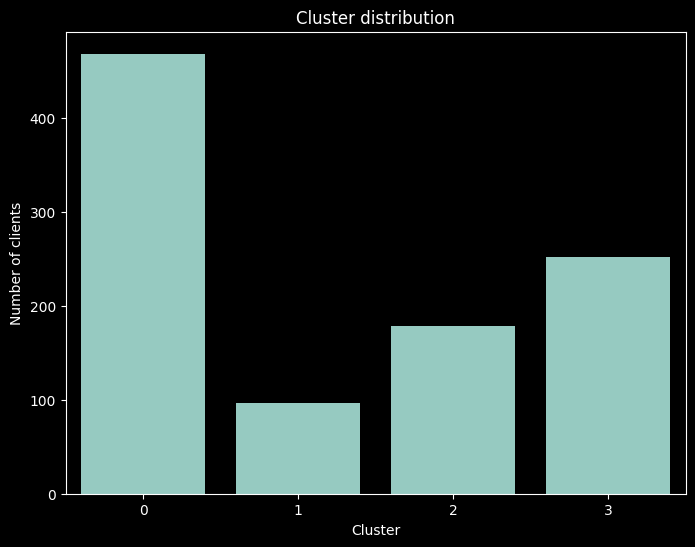

In [ ]:
param_grid = {'min_cluster_size': range(30, 200, 1)}

best_score = -1
best_params = None
for params in ParameterGrid(param_grid):
    score = evaluate_hdbscan(params['min_cluster_size'])
    if score > best_score:
        best_score = score
        best_params = params

print(f"Лучшие параметры: {best_params}")
print(f"Лучший коэффициент силуэта: {best_score}")

clusterer = hdbscan.HDBSCAN(min_cluster_size=best_params['min_cluster_size'])
labels = clusterer.fit_predict(df_tsne)

df1['Cluster'] = labels

sns.countplot(x='Cluster', data=df1)
plt.title('Cluster distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of clients')
plt.show()

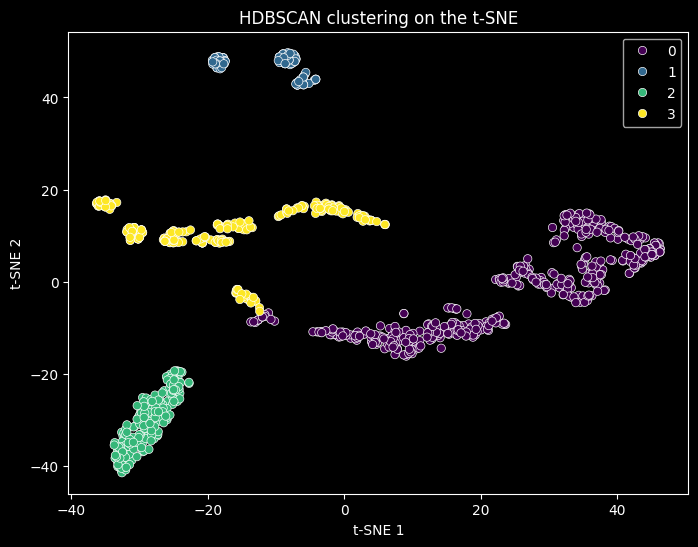

In [ ]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='viridis', legend='full')
plt.title('HDBSCAN clustering on the t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

In [ ]:
df_final = pd.get_dummies(df1, columns = ['context_type'], prefix = '', prefix_sep = '')

In [ ]:
cluster_stats = df_final.groupby('Cluster').agg(['mean', 'median', 'std', 'min', 'max'])
t = pd.DataFrame(cluster_stats).round

In [ ]:
cluster_means = df_final.groupby('Cluster').agg(['mean', 'median', 'max', 'min'])
cluster_means.round(2).T.style.background_gradient(cmap='coolwarm', axis=1)

In [ ]:
cluster_means = df_final.groupby('Cluster').mean()
cluster_means.round(2).T.style.background_gradient(cmap='coolwarm', axis=1)

Cluster,0,1,2,3
n_added_characters,71.490000,1.220000,22.800000,10.880000
n_removed_characters,3.930000,0.210000,2.490000,1.430000
n_talents,30.130000,3.120000,6.310000,12.600000
level,1.400000,0.850000,0.740000,1.410000
n_missions_completed,198.070000,57.980000,169.560000,66.180000
energy_delta,10.750000,6.700000,9.710000,7.790000
CompleteGuildRaidMatchContext,0.100000,0.000000,0.000000,0.010000
ConvertKnowledgeToGuildEnergyContext,0.160000,0.000000,0.000000,0.000000
GuildMissionRewardContext,0.740000,1.000000,1.000000,0.990000
